In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
from analysis_src.basic_inspection import data_info,data_describe
from analysis_src.missing_values import identify_missing_value
from analysis_src.bivariate_analysis import scatter_plot,box_plot
from src.handle_outliers import *

In [45]:
df = pd.read_csv('/Users/amanpreetsingh/Desktop/VSCode/Market/extracted_data/NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
data_info().inspect(df)

In [ ]:
data_describe().inspect(df)

In [ ]:
identify_missing_value().get_missing_value(df)

In [55]:
#check numerical features to find outliers before plotting

numeric_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(numeric_features)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS']


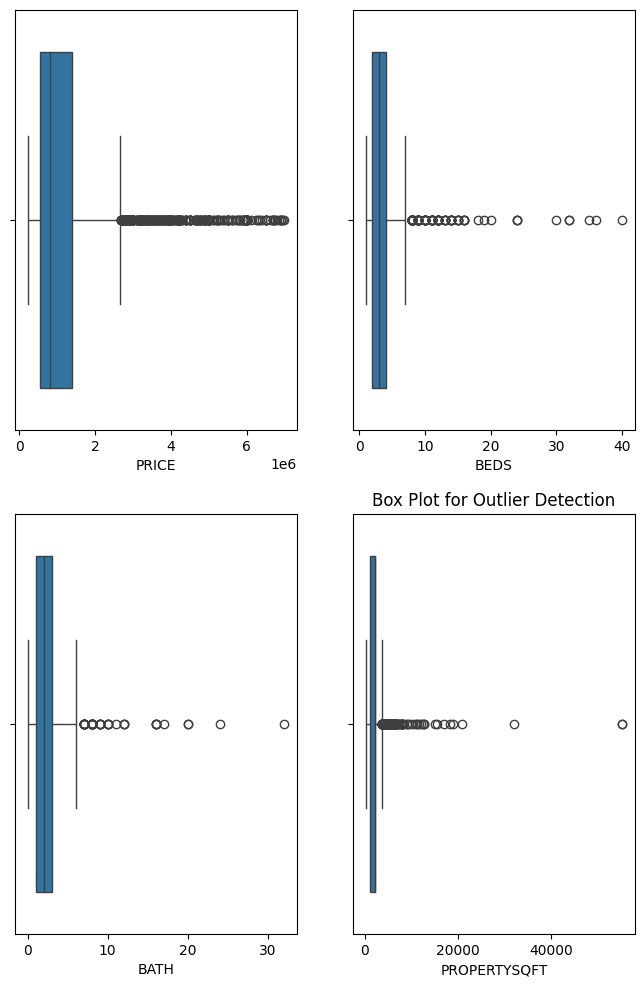

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(8, 12))  # 5 rows, 1 column


sns.boxplot(x=df['PRICE'],ax=axes[0,0])
plt.title("Box Plot for Outlier Detection")

sns.boxplot(x=df['BEDS'],ax=axes[0,1])
plt.title("Box Plot for Outlier Detection")

sns.boxplot(x=df['BATH'],ax=axes[1,0])
plt.title("Box Plot for Outlier Detection")

sns.boxplot(x=df['PROPERTYSQFT'],ax=axes[1,1])
plt.title("Box Plot for Outlier Detection")

plt.show()

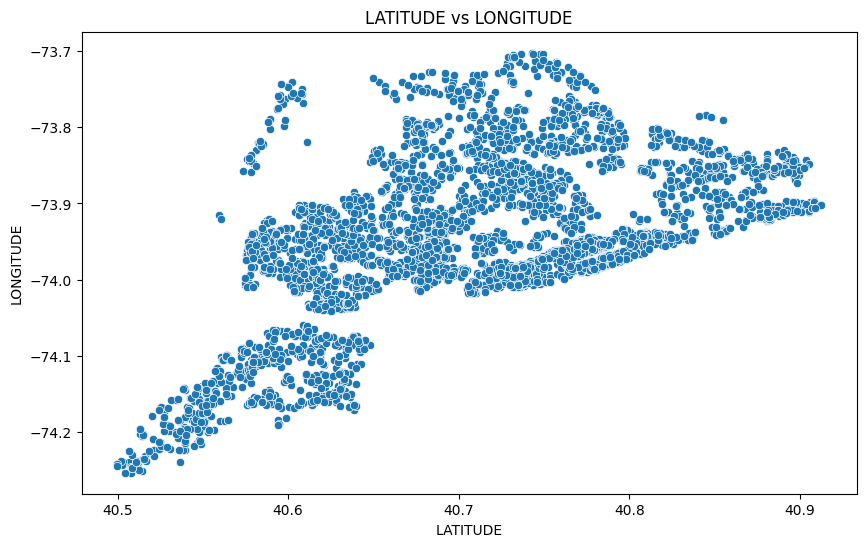

In [54]:
scatter_plot().my_plot(df,'LATITUDE','LONGITUDE')

In [47]:
temp = feature_skew_kurt().check_skew_kurt(df,'PRICE')
feature_skew_kurt().process_feature(temp[0],temp[1])
df = feature_skew_kurt().winsorization(df,'PRICE')

Right-Skewed
Heavy-tailed (Laplace/T-Distribution)
.
.
.
.
Z-Score: Best for normally distributed data.
IQR: Works well for skewed... distributions and robust datasets.
Percentile Capping: Useful when you don't want to lose data.


In [ ]:
temp = feature_skew_kurt().check_skew_kurt(df,'PRICE')
feature_skew_kurt().process_feature(temp[0],temp[1])
df = feature_skew_kurt().winsorization(df,'PRICE')

In [48]:
df.size

73508

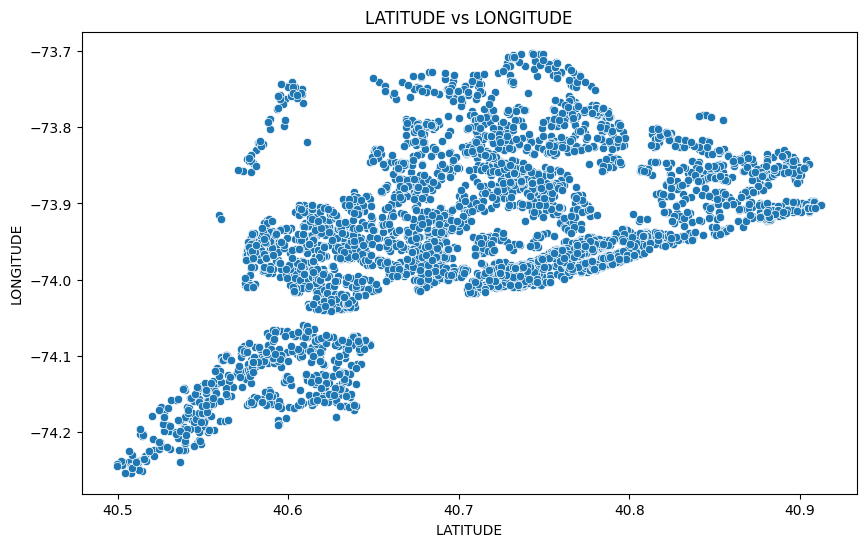

In [28]:
scatter_plot().my_plot(df,'LATITUDE','LONGITUDE')

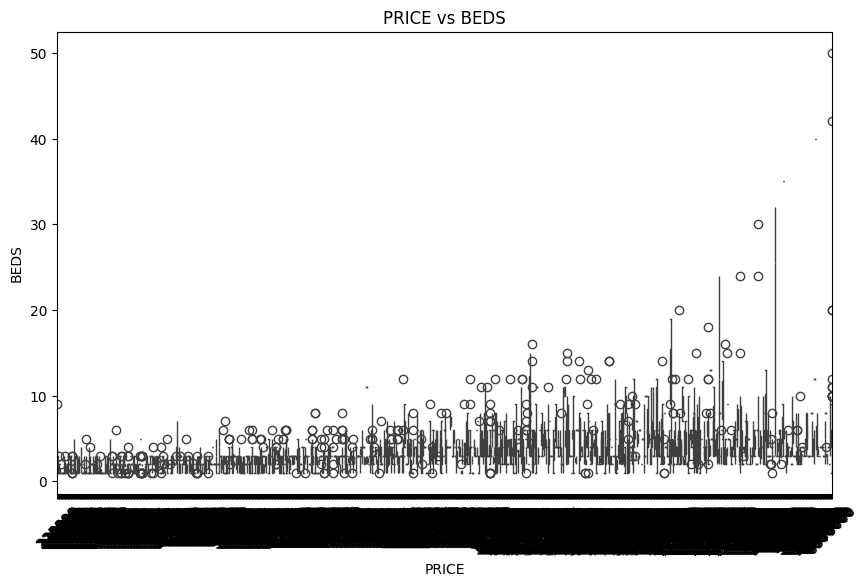

In [30]:
box_plot().my_plot(df,'PRICE','BEDS')

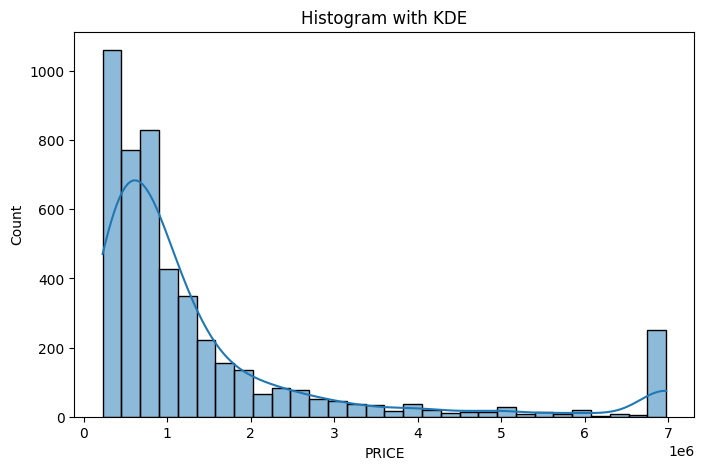

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['PRICE'], kde=True, bins=30)
plt.title("Histogram with KDE")
plt.show()

In [17]:
from scipy.stats import skew, kurtosis

skewness = skew(df['PRICE'])
kurt = kurtosis(df['PRICE'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Skewness: 66.77913216992879
Kurtosis: 4562.099226579617


In [20]:
# Set percentile limits
lower_limit = df['PRICE'].quantile(0.05)  # 5th percentile
upper_limit = df['PRICE'].quantile(0.95)  # 95th percentile

# Cap values
df['PRICE'] = np.clip(df['PRICE'], lower_limit, upper_limit)

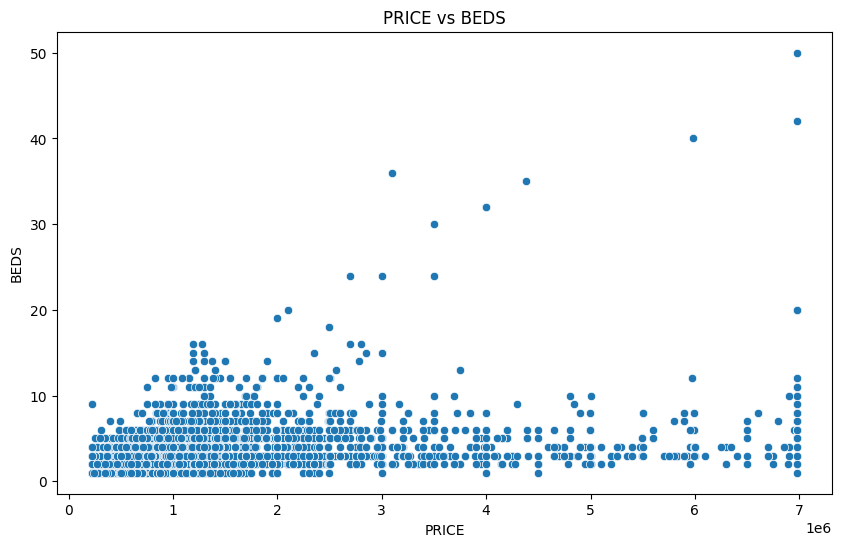

In [22]:
#dropping outlier before plotting

scatter_plot().my_plot(df,'PRICE','BEDS')